In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

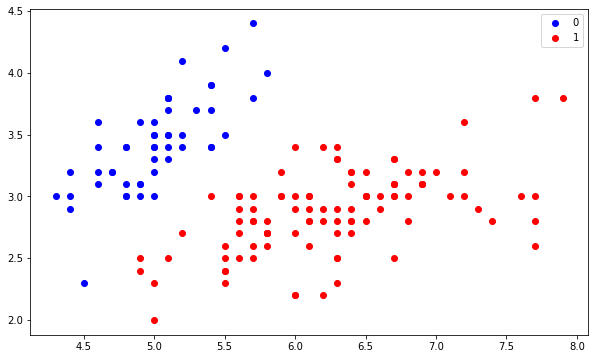

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [3]:
print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

【問題1】不純度を求める関数
---
>ノード の ジニ不純度 を計算する関数を作成してください。ノード 𝑡 に対するジニ不純度 𝐼(𝑡) は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

$
I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
$
>𝑡 : ノードのインデックス
𝑖 : クラスのインデックス
𝐾 : クラスの数
𝐶𝑖 : i番目のクラス
𝑃(𝐶𝑖|𝑡) :　t番目のノードにおける𝐶𝑖の割合
𝑁𝑡,𝑖 : t番目のノードのi番目のクラスに属するサンプル数
𝑁𝑡,𝑎𝑙𝑙 : t番目のノードのサンプルの総数
まずは簡単な例を作り、手計算と関数の結果を比較してください。

In [4]:
#自分で作成した式
# def gini_score():
#     gini = 0
#     sample_num = len(target)
#     threshold = threshold
    
#     parent_gini = (len(target)/sample_num)**2 + (len(target)/sample_num)**2
#     san_gini = (len(target)/sample_num)**2 + (len(target)/sample_num)**2
#     if san_gini < gini:
#         np.append(gini, san_gini)
#     else:
#         pass



In [5]:
# def gini_score(target):
#     classes = np.unique(target)
#     total_num = target.shape[0]
    
#     gini = 1.0
#     for c in classes:
#         print(c)
#         gini -= (len(target[target==c])/total_num) ** 2.0
#         print(gini)
        
#     return gini

# gini_score(y)

In [6]:
# from functools import lru_cache

# def build(data, target):
#     #対象とするサンプルの個数
#     total_num = data.shape[0]
#     feature_num = data.shape[1]
    
#     #ベストな分割を記憶しておくための変数の用意(これを更新していく)
#     best_ig = 0 #情報利用初期値
#     best_feature = None #最高の特徴量の初期値
#     best_threshold = None #最高の特徴量の初期値
    
#     gini = gini_func(target)
    
#     for f in range(feature_num):
        
#         #分割候補の計算
#         data_f = np.unique(data[:, f]) #番目の特徴量(重複削除)
        
#         for threshold in data_f:
            
#             #閾値で２グループに分割
#             target_left = target[data[:,f] < threshold] #dataのインデックスからターゲットのインデックスを参照して取得する。
#             target_right = target[data[:,f] >= threshold] #dataのインデックスからターゲットのインデックスを参照して取得する。
            
#             #分割後の不純度から情報利得(information gain)を計算
#             gini_left = gini_score(target_left)
#             gini_right = gini_score(target_right)
#             p_left = float(target_left.shape[0]) / total_num
#             p_right = float(target_right.shape[0]) / total_num
#             ig = gini - (p_left * gini_left + p_right * gini_right)
            
#             #最も良い分割であれば更新して保持
#             if ig > best_ig:
#                 best_ig = ig
#                 best_feature = f
#                 best_threshold = threshold
                
#         #情報利得が増えなければ終了(現在のノードを葉ノードにする)
#         if best_ig == 0:
#             return
            

In [28]:
import scipy.stats as stats


class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.gini = None
        self.verbose = verbose
        self.best_ig = None
        self.best_feature = None
        self.best_threshold = None
        self.label_left = None
        self.label_right = None
        
    def gini_score(self, target):
        classes = np.unique(target)
        total_num = target.shape[0]
    
        gini = 1.0
        for c in classes:
#             print(c)
            gini -= (len(target[target==c])/total_num) ** 2.0 #ジニ不純度の計算
#             print(gini)
        
        return gini
    
    
#     def build(data, target):
#         #対象とするサンプルの個数
#         total_num = data.shape[0] #シェイプの行の個数を取得
#         feature_num = data.shape[1] #シェイプで特徴量の個数を取得
    
#         #ベストな分割を記憶しておくための変数の用意(これを更新していく)
#         best_ig = 0 #情報利用初期値
#         best_feature = None #最高の特徴量の初期値
#         best_threshold = None #最高の特徴量の初期値
    
# #         self.gini = gini_score(target) #ジニ不純を求める
    
#         for f in range(feature_num): #特徴量の数だけfor文を回す
        
#             #分割候補の計算
#             data_f = np.unique(data[:, f]) #f番目の特徴量(重複削除)
        
#             for threshold in data_f:
            
#                 #閾値で２グループに分割
#                 target_left = target[data[:,f] < threshold] #dataのインデックスからターゲットのインデックスを参照して取得する。
#                 target_right = target[data[:,f] >= threshold] #dataのインデックスからターゲットのインデックスを参照して取得する。
            
#                 #分割後の不純度から情報利得(information gain)を計算
#                 gini_left = gini_score(target_left) #左側のGINIスコアを計算
#                 gini_right = gini_score(target_right) #右側のGINIスコアを計算
#                 p_left = float(target_left.shape[0]) / total_num #左側に分類されたサンプル数と全体のサンプル数
#                 p_right = float(target_right.shape[0]) / total_num #右側に分類されたサンプル数と全体のサンプル数
#                 ig = gini - (p_left * gini_left + p_right * gini_right) #情報利得IGを求める(両側のサンプル数とジニ不純度の掛け合わせ)
            
#                 #最も良い分割であれば更新して保持
#                 if ig > best_ig: #出てきたGINI不純度を更新
#                     self.best_ig = ig
#                     self.best_feature = f #一番よかったときの特徴量を記録 
#                     self.best_threshold = threshold #一番よかったときの閾値を保存
                
#             #情報利得が増えなければ終了(現在のノードを葉ノードにする)
#             if best_ig == 0:
#                 return
        
        
    def fit(self, data, target):
        #対象とするサンプルの個数
        total_num = data.shape[0] #シェイプの行の個数を取得
        feature_num = data.shape[1] #シェイプで特徴量の個数を取得
    
        #ベストな分割を記憶しておくための変数の用意(これを更新していく)
        self.best_ig = 0 #情報利用初期値
        self.best_feature = None #最高の特徴量の初期値
        self.best_threshold = None #最高の特徴量の初期値
    
        self.gini = self.gini_score(target) #ジニ不純を求める
    
        for f in range(feature_num): #特徴量の数だけfor文を回す
        
            #分割候補の計算
            data_f = np.unique(data[:, f]) #f番目の特徴量(重複削除)
        
            for threshold in data_f:
            
                #閾値で２グループに分割
                target_left = target[data[:,f] < threshold] #dataのインデックスからターゲットのインデックスを参照して取得する。
                target_right = target[data[:,f] >= threshold] #dataのインデックスからターゲットのインデックスを参照して取得する。
            
                #分割後の不純度から情報利得(information gain)を計算
                gini_left = self.gini_score(target_left) #左側のGINIスコアを計算
                gini_right = self.gini_score(target_right) #右側のGINIスコアを計算
                p_left = float(target_left.shape[0]) / total_num #左側に分類されたサンプル数と全体のサンプル数
                p_right = float(target_right.shape[0]) / total_num #右側に分類されたサンプル数と全体のサンプル数
                ig = self.gini - (p_left * gini_left + p_right * gini_right) #情報利得IGを求める(両側のサンプル数とジニ不純度の掛け合わせ)
            
                #最も良い分割であれば更新して保持
                if ig > self.best_ig: #出てきたGINI不純度を更新
                    self.best_ig = ig
                    self.best_feature = f #一番よかったときの特徴量を記録 
                    self.best_threshold = threshold #一番よかったときの閾値を保存
                
            #情報利得が増えなければ終了(現在のノードを葉ノードにする)
#             if best_ig == 0:
#                 return
        print('Best_threshold:{}'.format(self.best_threshold))
        print('Best_feature:{}'.format(self.best_feature))
        terget_left = target[data[:, self.best_feature] < self.best_threshold]
        print ('terget_left{}'.format(terget_left))
        
        terget_right = target[data[:, self.best_feature] >= self.best_threshold]
        print ('terget_right{}'.format(terget_right))
        print('-----------------------------------')
        self.label_left = stats.mode(terget_left)[0][0]
        self.label_right = stats.mode(terget_right)[0][0]
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
# #             print()
#         pass
    
    
    def predict_tree(self, d):
        if d[self.best_feature] < self.best_threshold:
            return self.label_left
        else:
            return self.label_right
    
    
    def predict(self, data):
        """
        決定木分類器を使いラベルを推定する
        """
        
        ans = []
        
        for d in data:
            label = self.predict_tree(d)# ルートノードでクラス予測したラベルが返ってくる
#             print(label)
            ans.append(label)
        return np.array(ans)
    
    def print_tree(self, depth, TF):
        """分類条件を出力する"""

        head = "    " * depth + TF + " -> "

        # 節の場合
        if self.feature != None:
            print(head + str(self.best_feature) + " < " + str(self.best_threshold) + "?")
            self.left.print_tree(depth + 1, "T")
            self.right.print_tree(depth + 1, "F")

        # 葉の場合
        else:
            print(head + "{" + str(self.label) + ": " + str(self.total_num) + "}")

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
X_train

array([[5.8, 2.7],
       [5.1, 3.8],
       [4.6, 3.4],
       [5. , 3.5],
       [6. , 3.4],
       [6.5, 3. ],
       [6.7, 3. ],
       [4.9, 3. ],
       [5.4, 3.4],
       [7.2, 3.6],
       [6.4, 3.1],
       [6.7, 3. ],
       [6.9, 3.2],
       [4.5, 2.3],
       [5. , 3.6],
       [6.8, 3. ],
       [6.3, 2.5],
       [5.5, 2.4],
       [4.8, 3.1],
       [5.9, 3. ],
       [4.9, 3.6],
       [6.4, 3.2],
       [6.9, 3.1],
       [6.2, 2.2],
       [6.1, 2.6],
       [5. , 3.5],
       [5.7, 2.6],
       [5.5, 3.5],
       [5.3, 3.7],
       [6.1, 3. ],
       [4.7, 3.2],
       [6.3, 3.3],
       [4.4, 3. ],
       [5. , 2. ],
       [6.6, 3. ],
       [6.4, 3.2],
       [6.5, 3.2],
       [6.3, 2.5],
       [5.1, 3.5],
       [5.1, 3.8],
       [7.1, 3. ],
       [6.9, 3.1],
       [4.8, 3. ],
       [6.1, 2.8],
       [7.7, 2.8],
       [5.1, 2.5],
       [6.3, 2.9],
       [4.4, 3.2],
       [5.7, 2.8],
       [6.5, 2.8],
       [5.4, 3.4],
       [7.7, 3.8],
       [7.9,

In [31]:
tree_scrach = ScratchDecesionTreeClassifierDepth1()
tree_fit = tree_scrach.fit(X_train, y_train)

Best_threshold:5.5
Best_feature:0
terget_left[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1]
terget_right[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
-----------------------------------


In [32]:
X.shape[1]

2

In [33]:
y_pred = tree_scrach.predict(X_test)

スクラッチ実装での閾値
---

In [34]:
print(tree_scrach.best_threshold)
print(tree_scrach.best_feature)

5.5
0


In [35]:
print(y_pred)

[1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 0]


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[14  0]
 [ 1 23]]
accuracy =  0.9736842105263158
precision =  1.0
recall =  0.9583333333333334
f1 score =  0.9787234042553191


Sklearnを用いた学習
----

In [37]:
from sklearn import tree #決定木のメソッドを呼び起こす
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image

#データの整形
clf = DecisionTreeClassifier()
clf_data = clf.fit(X_train, y_train)
y_pred_skl = clf.predict(X_test)

In [38]:
print(y_pred_skl)

[1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 0]


In [39]:
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_skl))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_skl))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_skl))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_skl))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_skl))

confusion matrix = 
 [[14  0]
 [ 0 24]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


描画：
----

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-40-e6a6aa044752>:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


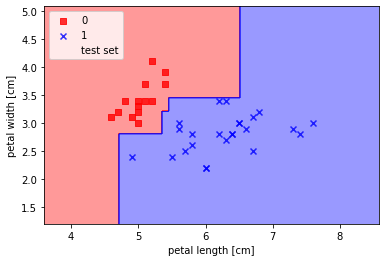

In [40]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_decision_regions(X, y, classifer, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifer.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

        
X_combined = X
y_combined = y
        
plot_decision_regions(X_test, y_pred_skl, classifer=clf_data, test_idx=range(0,38))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

from sklearn.tree import export_graphviz
export_graphviz(clf_data,
      out_file='tree.dot',
      feature_names=['petal length', 'petal width'])

In [41]:
print(X_test)
print(y_pred_skl)

[[6.8 3.2]
 [6.5 3. ]
 [6.5 3. ]
 [4.6 3.1]
 [7.3 2.9]
 [4.7 3.2]
 [6.7 3.1]
 [7.6 3. ]
 [5.6 2.9]
 [6.2 2.8]
 [6.7 2.5]
 [5.4 3.7]
 [5.2 4.1]
 [5.  3.4]
 [6.2 3.4]
 [7.4 2.8]
 [4.9 2.4]
 [5.7 2.5]
 [6.  2.2]
 [5.6 3. ]
 [6.6 2.9]
 [6.4 2.8]
 [5.5 2.4]
 [4.9 3.1]
 [5.  3. ]
 [5.2 3.4]
 [5.  3.3]
 [5.  3.2]
 [6.4 2.8]
 [6.3 3.4]
 [6.3 2.7]
 [5.8 2.8]
 [6.  2.2]
 [5.1 3.7]
 [5.1 3.4]
 [5.8 2.6]
 [4.8 3.4]
 [5.4 3.9]]
[1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 0]


シンプルデータセットを用いた分析：
---

In [42]:
X_simple = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y_simple = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

スクラッチを用いて実装:
----

In [50]:
tree_scrach_simple = ScratchDecesionTreeClassifierDepth1()
tree_scrach_simple.fit(X_simple, y_simple)

Best_threshold:5.3524
Best_feature:1
terget_left[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
terget_right[0 0 1 1 1 1 1 1 1 1 1]
-----------------------------------


In [51]:
y_simple_predict = tree_scrach_simple.predict(X_simple)

In [52]:
print('confusion matrix = \n', confusion_matrix(y_true=y_simple, y_pred=y_simple_predict))
print('accuracy = ', accuracy_score(y_true=y_simple, y_pred=y_simple_predict))
print('precision = ', precision_score(y_true=y_simple, y_pred=y_simple_predict))
print('recall = ', recall_score(y_true=y_simple, y_pred=y_simple_predict))
print('f1 score = ', f1_score(y_true=y_simple, y_pred=y_simple_predict))

confusion matrix = 
 [[18  2]
 [11  9]]
accuracy =  0.675
precision =  0.8181818181818182
recall =  0.45
f1 score =  0.5806451612903226


シンプルデータを使い、Sklearnで実装した値：
---

In [48]:
clf = DecisionTreeClassifier()
clf_simple = clf.fit(X_simple, y_simple)
y_pred_simple_skl = clf_simple.predict(X_simple)

In [49]:
print('confusion matrix = \n', confusion_matrix(y_true=y_simple, y_pred=y_pred_simple_skl))
print('accuracy = ', accuracy_score(y_true=y_simple, y_pred=y_pred_simple_skl))
print('precision = ', precision_score(y_true=y_simple, y_pred=y_pred_simple_skl))
print('recall = ', recall_score(y_true=y_simple, y_pred=y_pred_simple_skl))
print('f1 score = ', f1_score(y_true=y_simple, y_pred=y_pred_simple_skl))

confusion matrix = 
 [[20  0]
 [ 0 20]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


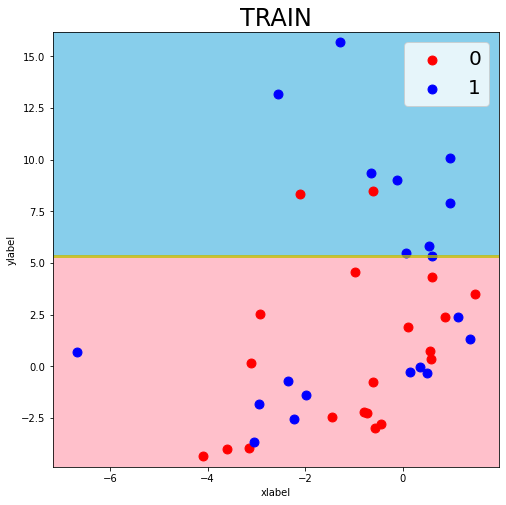

In [53]:
# 決定領域の可視化
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']
                   ):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
# スクラッチの決定木の分類結果
fit,ax = plt.subplots(figsize=(8,8))
plt.rcParams["font.size"] = 20
decision_region(X_simple,y_simple,tree_scrach_simple,target_names=['0', '1'],title='TRAIN')